# Logistic Regression - Heart disease

In [170]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
df = pd.read_csv("C:\\Users\\ysaru\\Desktop\\Datasets\\framingham_heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## --------------------------------- Visualization ------------------------------

<Axes: xlabel='TenYearCHD', ylabel='count'>

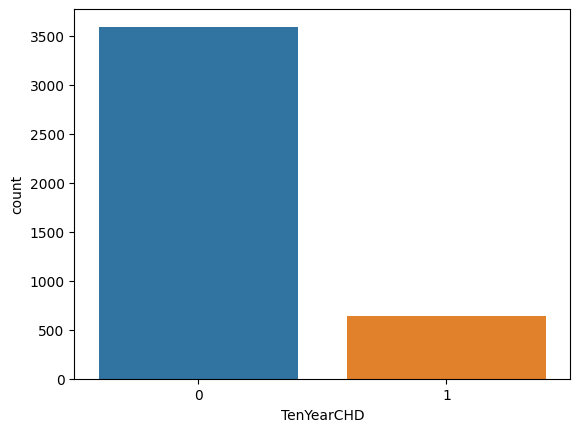

In [3]:
sns.countplot(x='TenYearCHD', data=df)

In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
cat_f = ['male','currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes']

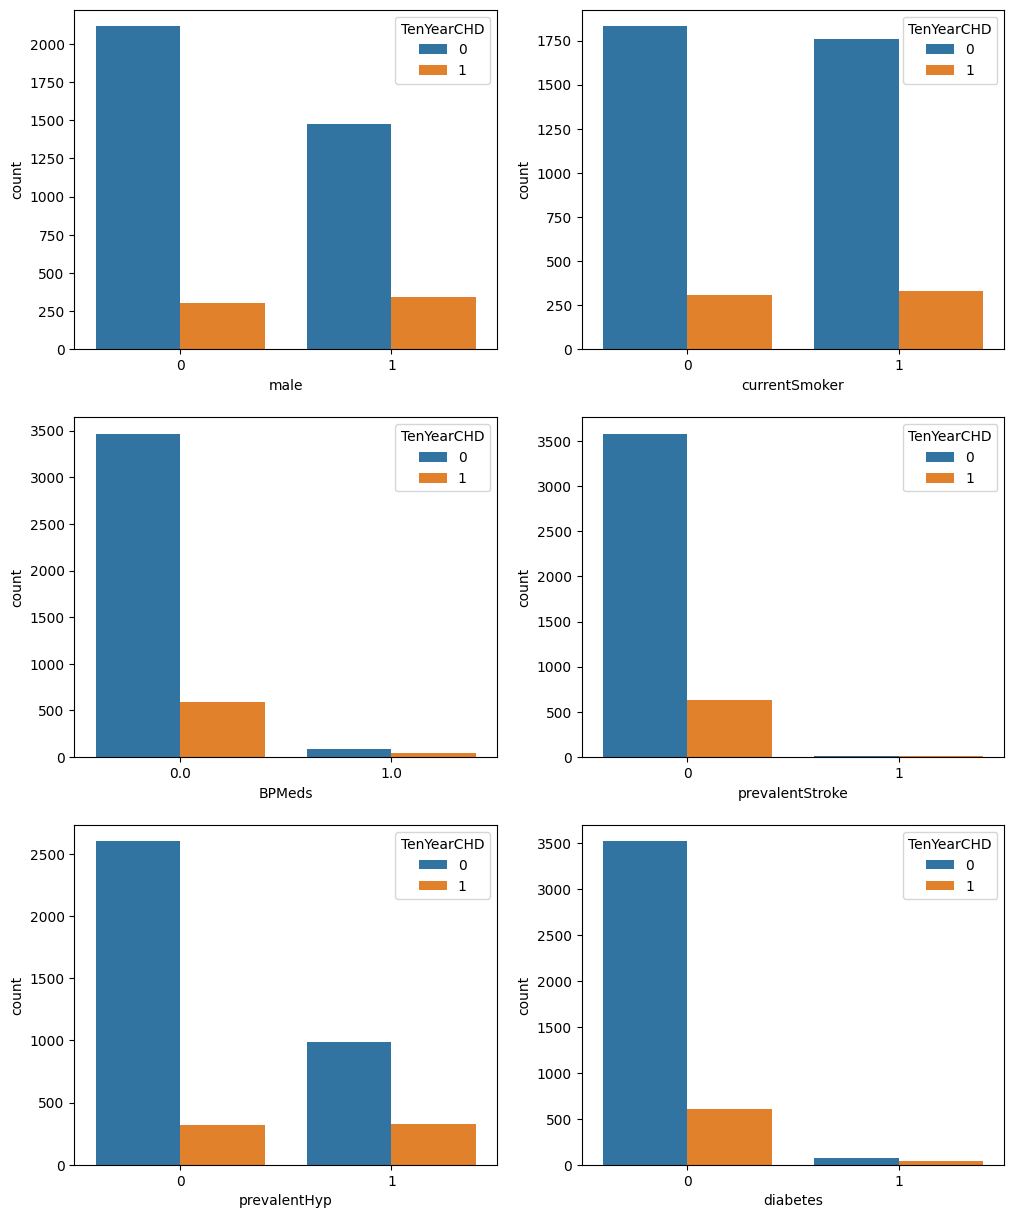

In [6]:
fig, axes = plt.subplots(3,2, figsize=(12,15))

for idx, f in enumerate(cat_f):
    row,col = idx//2, idx%2
    sns.countplot(x=f, data=df, hue='TenYearCHD', ax=axes[row,col])
plt.show()

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

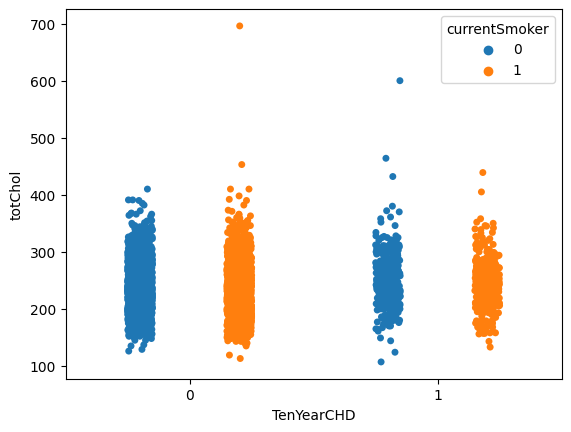

In [7]:
sns.stripplot(x='TenYearCHD', y='totChol', hue='currentSmoker', data=df, jitter=True, dodge=True)

In [60]:
num_f = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

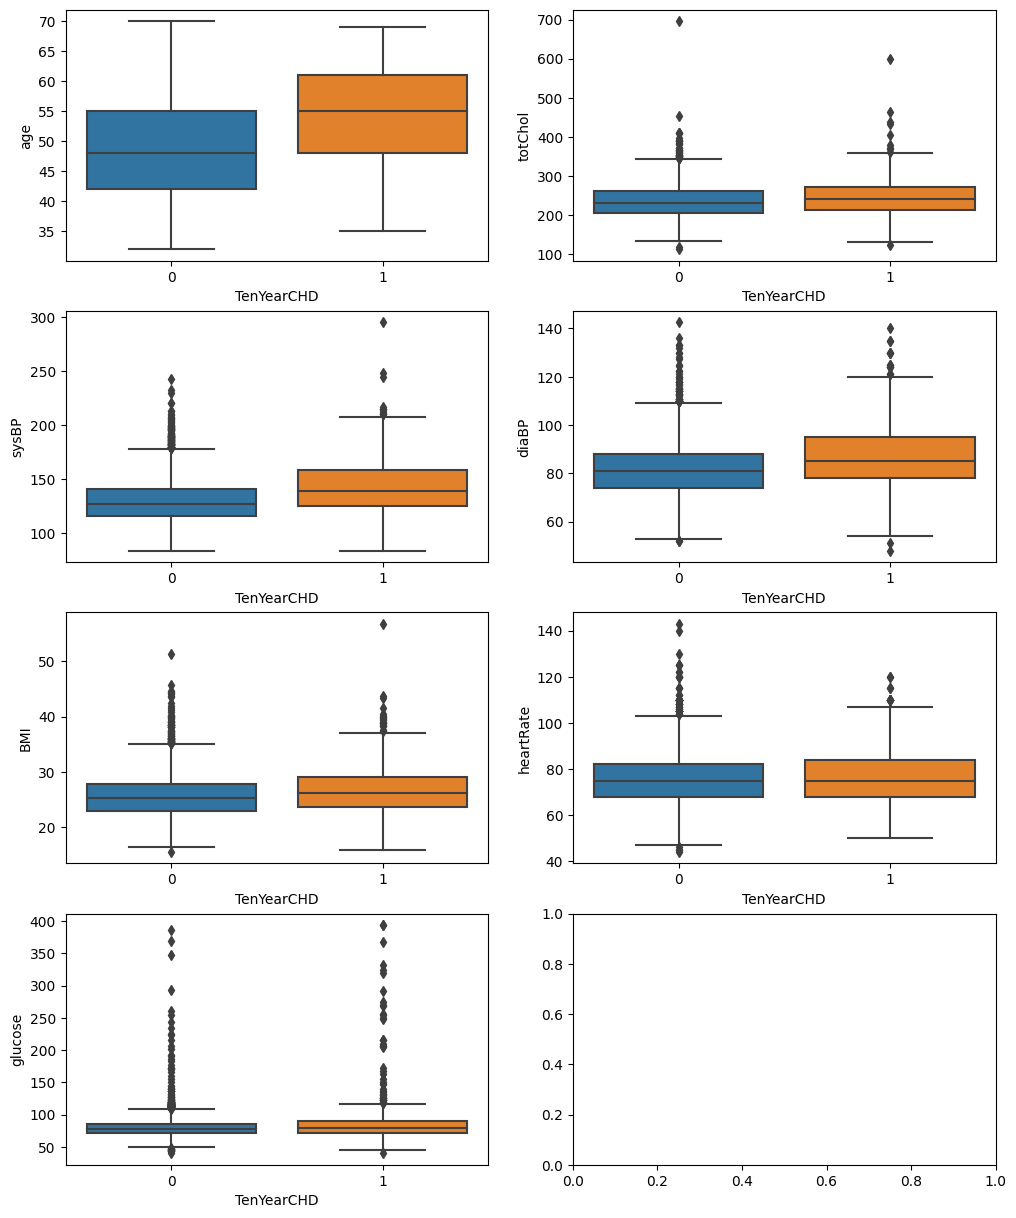

In [61]:
fig, axes = plt.subplots(4,2, figsize=(12,15))

for idx, f in enumerate(num_f):
    row,col = idx//2, idx%2
    sns.boxplot(x='TenYearCHD', y=f,  data=df, ax=axes[row,col])
plt.show()

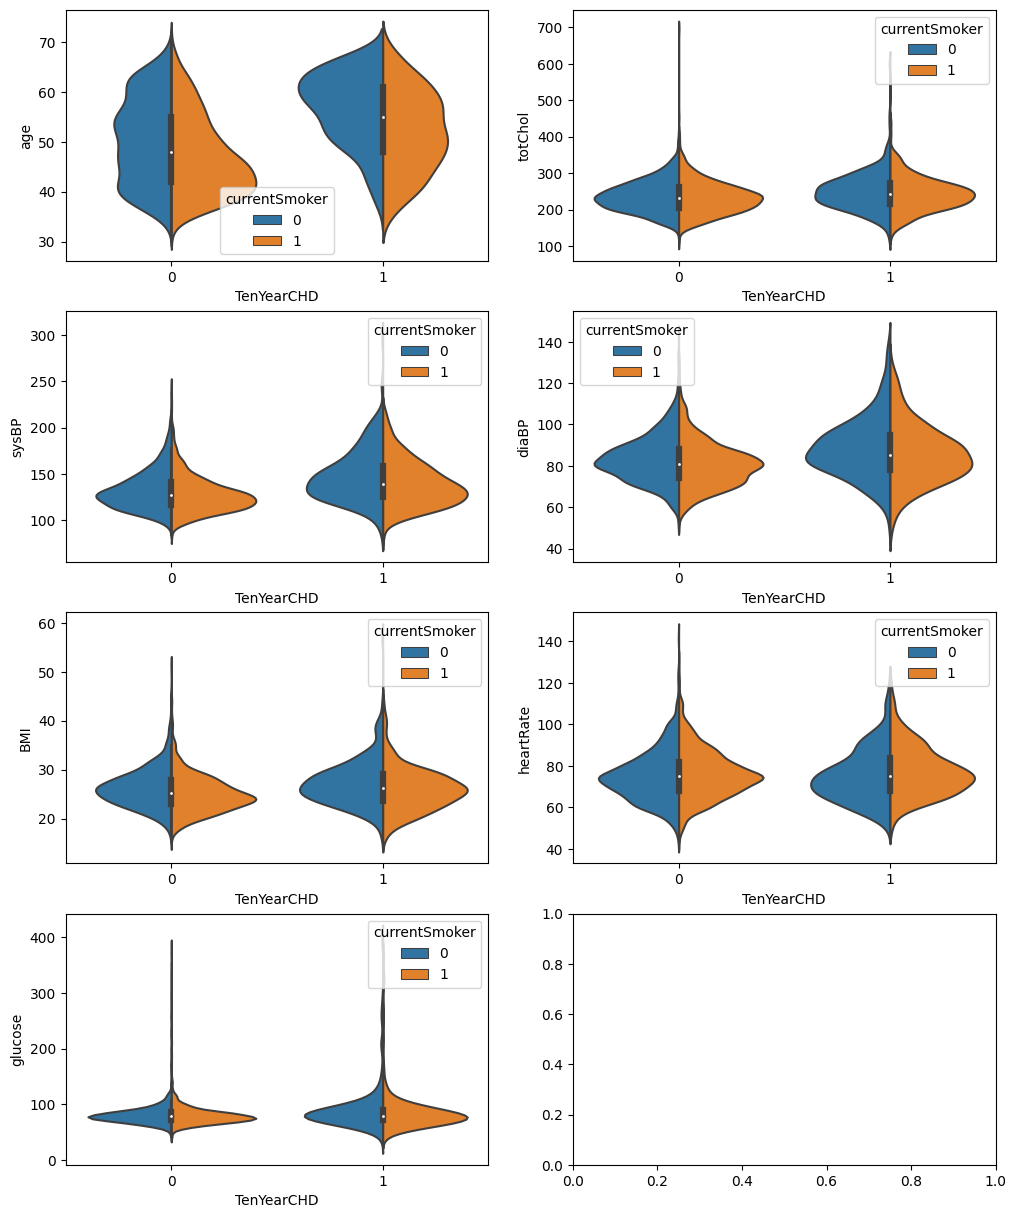

In [62]:
fig, axes = plt.subplots(4,2, figsize=(12,15))

for idx, f in enumerate(num_f):
    row,col = idx//2,idx%2
    sns.violinplot(x='TenYearCHD', y=f, hue='currentSmoker', split=True, data=df, ax=axes[row,col])
plt.show()

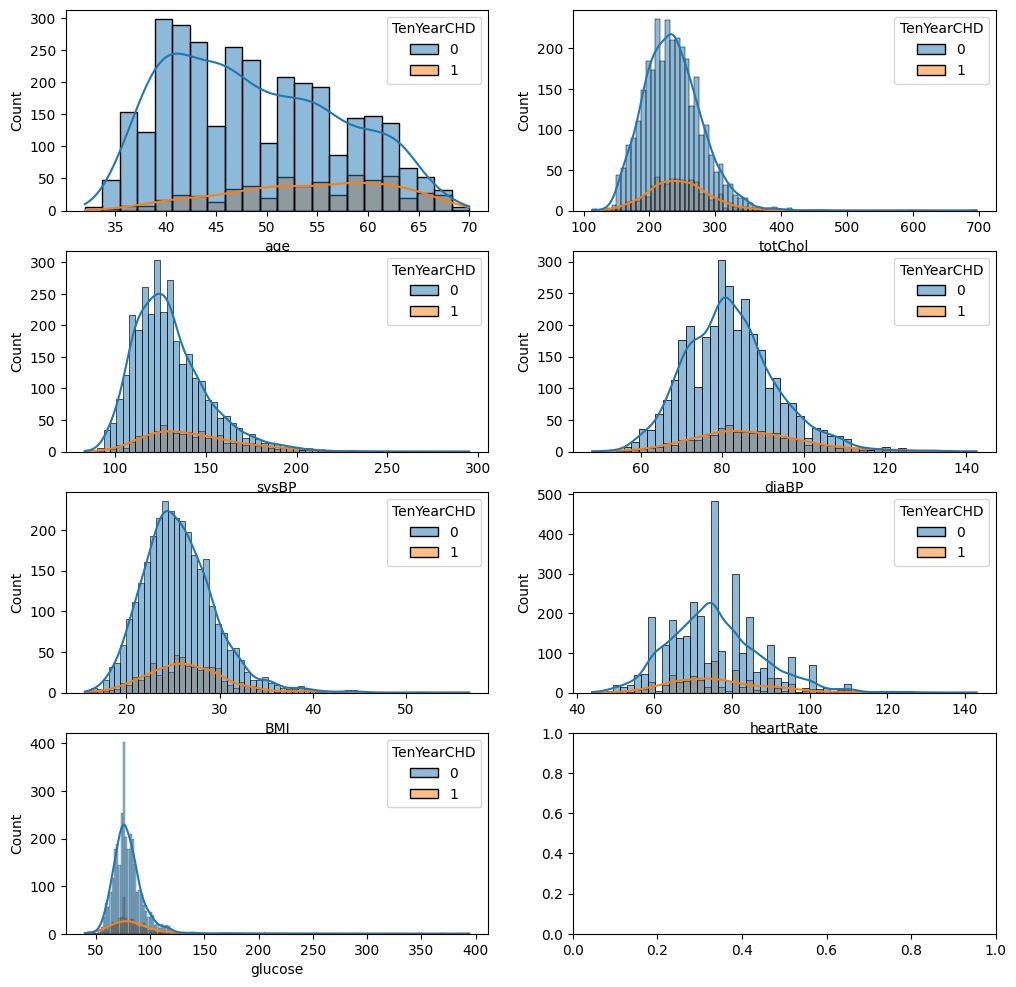

<Figure size 640x480 with 0 Axes>

In [65]:
fig, axes = plt.subplots(4,2, figsize=(12,12))

for idx, f in enumerate(num_f):
    row,col = idx//2, idx%2
    sns.histplot(x=f, data=df, hue = 'TenYearCHD', kde=True, ax=axes[row,col])
plt.show()
plt.tight_layout()

In [12]:
df2 = df.iloc[:,9:15]
df2.head()

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,195.0,106.0,70.0,26.97,80.0,77.0
1,250.0,121.0,81.0,28.73,95.0,76.0
2,245.0,127.5,80.0,25.34,75.0,70.0
3,225.0,150.0,95.0,28.58,65.0,103.0
4,285.0,130.0,84.0,23.10,85.0,85.0


<Axes: >

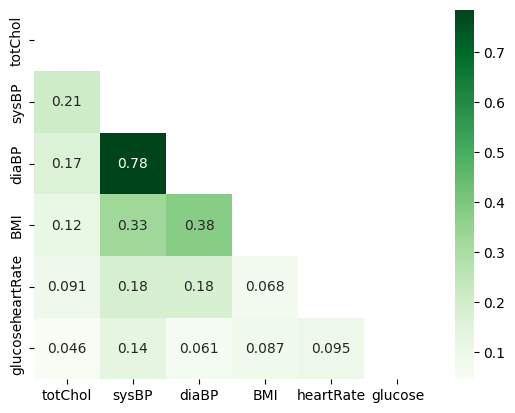

In [13]:
mask = np.triu(np.ones_like(df2.corr()))

sns.heatmap(df2.corr(), mask=mask, annot=True, cmap='Greens')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [106]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [172]:
df.drop(['education'], axis=1, inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [173]:
x = df.isnull().sum().sum()
print(x)
y = x/len(df['male'])
print(y*100)

540
12.741859367626237


In [174]:
df = df.dropna()

In [175]:
df.isnull().sum().sum()

0

In [176]:
df.shape

(3749, 15)

In [22]:
corr = df.corr()
corr

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


In [177]:
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [117]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = scale.fit_transform(X)
X

array([[ 1.11635803, -1.2346638 , -0.97705693, ...,  0.28542409,
         0.35931906, -0.20444626],
       [-0.89576997, -0.41768745, -0.97705693, ...,  0.71835091,
         1.61390166, -0.24631379],
       [ 1.11635803, -0.18426563,  1.02348181, ..., -0.11552519,
        -0.05887514, -0.49751902],
       ...,
       [ 1.11635803,  0.04915618,  1.02348181, ...,  0.03944294,
        -0.8116247 ,  0.17236158],
       [ 1.11635803,  0.16586709,  1.02348181, ..., -1.50039906,
        -0.89526354, -0.5812541 ],
       [-0.89576997,  0.282578  , -0.97705693, ..., -1.06747224,
         0.35931906,  1.05157988]])

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
lg = LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [120]:
y_pred = lg.predict(X_test)

### Plot Learning Curve

In [84]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lg, X ,y, cv=10, train_sizes=np.linspace(0.1,1.0,5), scoring='accuracy' )

In [85]:
a = np.linspace(0.1,1.0,5)
a

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [86]:
train_scores

array([[0.8189911 , 0.83086053, 0.80712166, 0.80712166, 0.80712166,
        0.80712166, 0.80712166, 0.80712166, 0.80712166, 0.80712166],
       [0.85766423, 0.8540146 , 0.85127737, 0.84762774, 0.84124088,
        0.84124088, 0.84124088, 0.84124088, 0.84124088, 0.84124088],
       [0.85390836, 0.85175202, 0.85336927, 0.84797844, 0.84959569,
        0.85606469, 0.85606469, 0.85606469, 0.85606469, 0.85606469],
       [0.85921959, 0.8565417 , 0.85730681, 0.85424637, 0.85615914,
        0.85883703, 0.85386381, 0.85730681, 0.85730681, 0.85730681],
       [0.85506817, 0.85328986, 0.85358625, 0.85210433, 0.85417902,
        0.85477178, 0.85240071, 0.85506817, 0.85417902, 0.8562537 ]])

In [87]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_mean

array([0.81068249, 0.84580292, 0.85369272, 0.85680949, 0.8540901 ])

In [88]:
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_mean

array([0.83355294, 0.85195722, 0.8522246 , 0.85355793, 0.85355865])

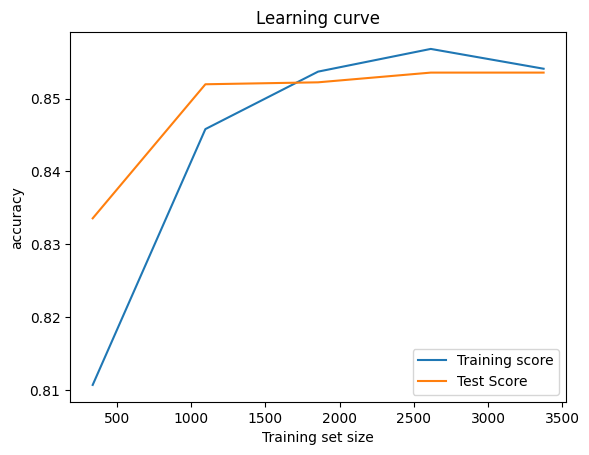

In [89]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test Score')
plt.xlabel('Training set size')
plt.ylabel('accuracy')
plt.title('Learning curve')
#plt.ylim(0,1)
plt.legend()
plt.show()

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, f1_score, recall_score, precision_score

test_cf = confusion_matrix(Y_test, y_pred)
test_cf

array([[945,   5],
       [164,  11]], dtype=int64)

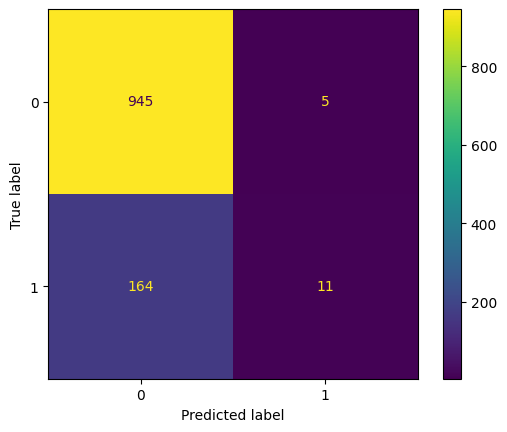

In [218]:
from sklearn.metrics import ConfusionMatrixDisplay

#clf = lg(random_state=0)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

In [219]:
test_acc_score = accuracy_score(Y_test, y_pred)
print("accuracy:", test_acc_score)

accuracy: 0.8497777777777777


In [220]:
print('f1 score:', f1_score(Y_test, y_pred))
print('recall:', recall_score(Y_test, y_pred))
print('precision:', precision_score(Y_test, y_pred))

f1 score: 0.11518324607329844
recall: 0.06285714285714286
precision: 0.6875


In [221]:
print("roc_auc:", roc_auc_score(Y_test, y_pred))

roc_auc: 0.528796992481203


#### - We note that the recall score using the default threshold value of 0.5 is very low in predicting possibility of heart disease, which means that the TPR is very low
- In medical diagnosis we want hight TPR, i.e. low number of false negatives. 
- We do not care if we have high number of false positives because predicting that a person might have heart disease and then him not having it is better than predicting that he doesn't have a heart disease and then him having it. 
- So we will find a new threshold value to improve TPR and hence the recall score

In [222]:
#predict_proba gives two columns as out put...first one that has '0' as output and second one that has '1' as output...
#we are choosing the second column

#The predict_proba function returns the probability estimates for each class, and we select
#the probability estimates for class 1 by using [:, 1]

y_pred1 = lg.predict_proba(X_test)[:,1]

In [223]:
y_pred1
len(y_pred1)

1125

In [224]:
y_pred1

array([0.08288552, 0.37248502, 0.05313363, ..., 0.13565298, 0.9397382 ,
       0.38278952])

In [225]:
## keep probabilities for the positive outcome only when calculating fpr and tpr and using it to plot ROC-curve. 
## Because only when we use probabilities for the positive outcome we get a range of thresholds that help us to
## plot ROC-curve. If we use the final probability or the original y_pred values, we get thresholds as [inf, 1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)
thresholds

array([       inf, 1.        , 0.99999991, 0.99999794, 0.99999139,
       0.99987129, 0.9998455 , 0.99982601, 0.99872449, 0.99866883,
       0.99844914, 0.99739476, 0.99558115, 0.99547453, 0.99320953,
       0.99298174, 0.99123582, 0.99005773, 0.98946515, 0.98892147,
       0.98774278, 0.9866026 , 0.98381356, 0.9819477 , 0.9812906 ,
       0.97976948, 0.97781156, 0.97768289, 0.97754464, 0.97627195,
       0.97575995, 0.97518987, 0.97258983, 0.97068993, 0.9685505 ,
       0.96637063, 0.96459619, 0.96293453, 0.96169407, 0.96103258,
       0.95362851, 0.95301072, 0.95291399, 0.95063444, 0.94980121,
       0.94943882, 0.9397382 , 0.93889762, 0.93809839, 0.93527547,
       0.93526531, 0.93461186, 0.93087966, 0.92813265, 0.9174173 ,
       0.91725948, 0.8935726 , 0.89356023, 0.89266021, 0.89031903,
       0.88234184, 0.88206674, 0.87981416, 0.87921353, 0.87512677,
       0.87309423, 0.86927652, 0.86492528, 0.85799714, 0.85695305,
       0.8552339 , 0.85275188, 0.85105673, 0.85019612, 0.84947

In [226]:
len(thresholds)

303

In [227]:
# below we are iterating through the list of threshholds to find the specific threshold value that maximises the accuracy score

accuracy_ls = []
for thres in thresholds:
    y_pred_thresh = np.where(y_pred1>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test, y_pred_thresh))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head() 

,thresholds,accuracy
6,0.999846,0.846222
2,1.000000,0.845333
4,0.999991,0.845333
5,0.999871,0.845333
7,0.999826,0.845333


In [228]:
# below we are iterating through the list of threshholds to find the specific threshold value that maximises the f1 score

f1_ls = []
for thres in thresholds:
    y_pred_f = np.where(y_pred1>thres,1,0)
    f1_ls.append(f1_score(Y_test, y_pred_f))
    
f1_ls = pd.concat([pd.Series(thresholds),pd.Series(f1_ls)], axis=1)
f1_ls.columns = ['thresholds', 'f1-score']
f1_ls.sort_values(by='f1-score', ascending=False, inplace=True)
f1_ls.head()

,thresholds,f1-score
190,0.536785,0.355487
191,0.535809,0.354938
186,0.541567,0.353678
188,0.538694,0.353488
187,0.541542,0.353125


In [229]:
recall_ls = []
for thres in thresholds:
    y_pred_r = np.where(y_pred1>thres,1,0)
    recall_ls.append(recall_score(Y_test, y_pred_r))
    
recall_ls = pd.concat([pd.Series(thresholds),pd.Series(recall_ls)], axis=1)
recall_ls.columns = ['thresholds', 'recall']
recall_ls.sort_values(by='recall', ascending=False, inplace=True)
recall_ls.head()

,thresholds,recall
302,0.031675,1.000000
301,0.049218,0.994286
300,0.052471,0.994286
299,0.057414,0.988571
298,0.057621,0.988571


In [230]:
y_pred_f
x = list(y_pred_f)
x.count(1)

1124

In [231]:
# we use the threshold value of 0.165 ~ 0.17 which gives the maximum f1 score as shown above

y_pred_final = (lg.predict_proba(X_test)[:,1]>=0.17)

In [232]:
print('accuracy:', accuracy_score(Y_test, y_pred))
print('f1 score:', f1_score(Y_test, y_pred))
print('recall:', recall_score(Y_test, y_pred))
print('precision:', precision_score(Y_test, y_pred))
print('roc auc score:', roc_auc_score(Y_test, y_pred))

accuracy: 0.8497777777777777
f1 score: 0.11518324607329844
recall: 0.06285714285714286
precision: 0.6875
roc auc score: 0.528796992481203


In [233]:
print('accuracy_thresh:', accuracy_score(Y_test, y_pred_final))
print('f1 score_thresh:', f1_score(Y_test, y_pred_final))
print('recall_thresh:', recall_score(Y_test, y_pred_final))
print('precision_thresh:', precision_score(Y_test, y_pred_final))
print('roc auc score:', roc_auc_score(Y_test, y_pred_final))

accuracy_thresh: 0.2986666666666667
f1 score_thresh: 0.30115146147032773
recall_thresh: 0.9714285714285714
precision_thresh: 0.17819706498951782
roc auc score: 0.5730827067669173


## Results
####  We can see from the above results that recall value has imprved from 0.06 to 0.56!

In [234]:
cm_thresh = confusion_matrix(Y_test, y_pred_final)
cm_thresh

array([[166, 784],
       [  5, 170]], dtype=int64)

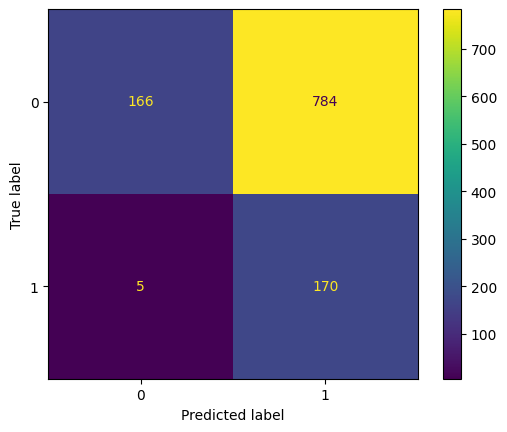

In [235]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_final)

## Plot ROC Curve

In [236]:
## keep probabilities for the positive outcome only when calculating fpr and tpr and using it to plot ROC-curve. 
## Because only when we use probabilities for the positive outcome we get a range of thresholds that help us to
## plot ROC-curve. If we use the final probability or the original y_pred values, we get thresholds as [inf, 1, 0]

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

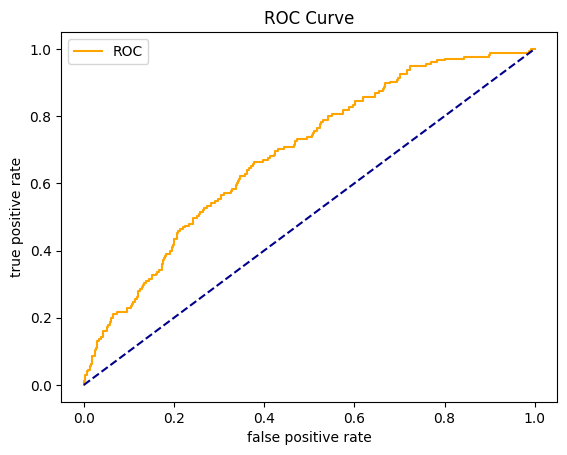

In [237]:
plot_roc_curve(fpr, tpr)

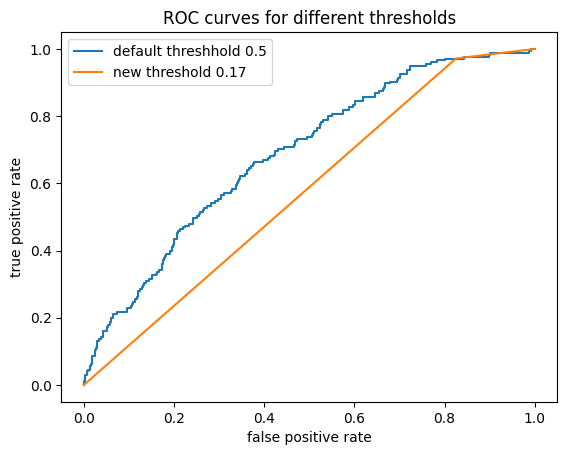

In [238]:
## keep probabilities for the positive outcome only when calculating fpr and tpr and using it to plot ROC-curve. 
## Because only when we use probabilities for the positive outcome we get a range of thresholds that help us to
## plot ROC-curve. If we use the final probability or the original y_pred values, we get thresholds as [inf, 1, 0]

fpr_, tpr_, thresholds_ = roc_curve(Y_test, y_pred_final)
plt.plot(fpr, tpr, label='default threshhold 0.5')
plt.plot(fpr_, tpr_, label='new threshold 0.17')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves for different thresholds')
plt.legend()
plt.show()

In [240]:
thresholds_

array([inf,  1.,  0.])

In [53]:
def plot_thresh_tpr_curve(thresholds,tpr):
    plt.plot(thresholds, tpr, color='orange', label='Thresh')
    plt.xlabel('thresholds')
    plt.ylabel('true positive rate')
    plt.title('Threshold vs TPR')
    plt.legend()
    plt.show()

In [59]:
thresholds1

array([inf,  1.,  0.])

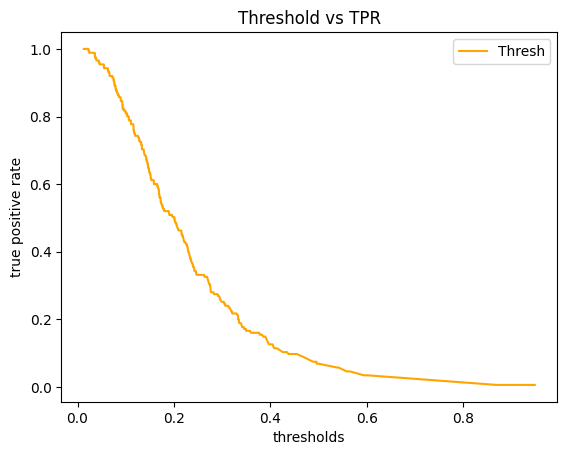

In [55]:
plot_thresh_tpr_curve(thresholds,tpr)

In [67]:
pip install imblearn


     -------------------------------------- 235.6/235.6 kB 1.4 MB/s eta 0:00:00


# Handling Imbalanced Data

## Method 1: Undersampling using NearMiss

In [197]:
from imblearn.under_sampling import NearMiss

In [198]:
nm = NearMiss()
X_u, y_u = nm.fit_resample(X,y)

In [199]:
X_u.shape, y_u.shape

((1144, 14), (1144,))

In [200]:
X_trainu, X_testu, y_trainu, y_testu = train_test_split(X_u, y_u, test_size=0.3, random_state=0)

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trainu = scaler.fit_transform(X_trainu)
X_testu = scaler.transform(X_testu)

In [202]:
y_testu.shape

(344,)

In [203]:
from collections import Counter
print('Original target variable count: {}'.format(Counter(y)))
print('Modified target variable count: {}'.format(Counter(y_u)))

Original target variable count: Counter({0: 3177, 1: 572})
Modified target variable count: Counter({0: 572, 1: 572})


In [204]:
lg.fit(X_trainu, y_trainu)

LogisticRegression()

In [205]:
y_predu = lg.predict(X_testu)

In [206]:
print('accuracy:', accuracy_score(y_testu, y_predu))

accuracy: 0.7093023255813954


In [207]:
print('recall:', recall_score(y_testu, y_predu))
print('f1-score:', f1_score(y_testu, y_predu))
print('precision:', precision_score(y_testu, y_predu))

recall: 0.6648648648648648
f1-score: 0.7109826589595376
precision: 0.7639751552795031


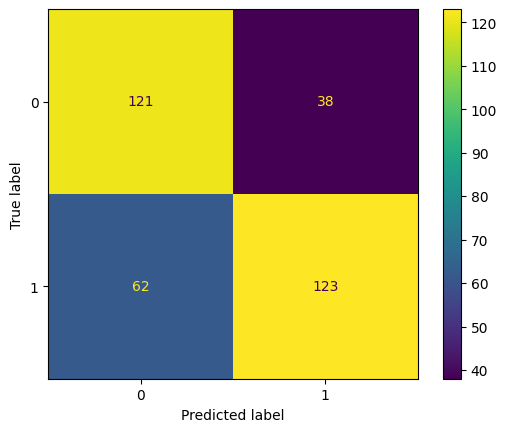

In [208]:
ConfusionMatrixDisplay.from_predictions(y_testu, y_predu)

In [211]:
probu = lg.predict_proba(X_testu)[:,1]

fpru, tpru, thresholdsu = roc_curve(y_testu, probu)
thresholdsu

array([       inf, 0.9998192 , 0.92014258, 0.91630922, 0.91025963,
       0.90385833, 0.88877916, 0.88398322, 0.82296774, 0.82112515,
       0.77103733, 0.7710004 , 0.76960658, 0.76736558, 0.72836542,
       0.72488497, 0.68471079, 0.67934108, 0.67438358, 0.67432365,
       0.67371048, 0.6734304 , 0.6648081 , 0.66280416, 0.66162727,
       0.65671252, 0.65028019, 0.6492217 , 0.64425424, 0.63629724,
       0.63391024, 0.63273042, 0.61428006, 0.60664004, 0.59508859,
       0.5948557 , 0.55995082, 0.55503639, 0.55371346, 0.54487389,
       0.54334671, 0.53353973, 0.52782747, 0.52069244, 0.51851696,
       0.50043225, 0.49676305, 0.49511163, 0.49369052, 0.48799667,
       0.48610716, 0.47954232, 0.47913338, 0.47005313, 0.45964593,
       0.44143678, 0.43843907, 0.41372062, 0.41326926, 0.4027133 ,
       0.40165536, 0.39791001, 0.39556824, 0.3943392 , 0.39252849,
       0.39234317, 0.38292372, 0.37303844, 0.36406045, 0.36230559,
       0.36230329, 0.36112697, 0.34408274, 0.34201543, 0.33649

In [212]:
roc_auc_score(y_testu, probu)

0.7854835968043515

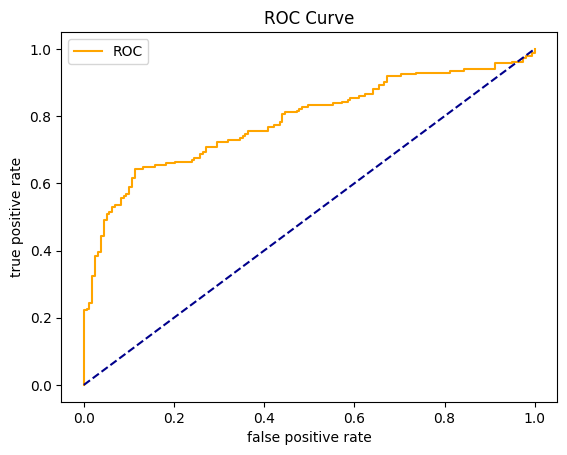

In [214]:
plot_roc_curve(fpru, tpru)

## Method 2: Oversampling using SMOTETomek

In [178]:
from imblearn.combine import SMOTETomek

In [179]:
smk = SMOTETomek(random_state=0)
X_so, y_so = smk.fit_resample(X,y)

In [180]:
X_so.shape, y_so.shape

((6296, 14), (6296,))

In [181]:
print('Original target variable count {}'.format(Counter(y)))
print('Oversampled target variable count {}'.format(Counter(y_so)))

Original target variable count Counter({0: 3177, 1: 572})
Oversampled target variable count Counter({0: 3148, 1: 3148})


In [182]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(X_so, y_so, test_size=0.3, random_state=0)

In [183]:
X_train_so = scaler.fit_transform(X_train_so)
X_test_so = scaler.transform(X_test_so)

In [184]:
lg.fit(X_train_so, y_train_so)

LogisticRegression()

In [185]:
y_pred_so = lg.predict(X_test_so)

In [186]:
print('accuracy:', accuracy_score(y_test_so, y_pred_so))
print('recall:', recall_score(y_test_so, y_pred_so))
print('f1-score:', f1_score(y_test_so, y_pred_so))
print('precision:', precision_score(y_test_so, y_pred_so))

accuracy: 0.6627845420857597
recall: 0.6578108395324124
f1-score: 0.6602666666666667
precision: 0.6627408993576017


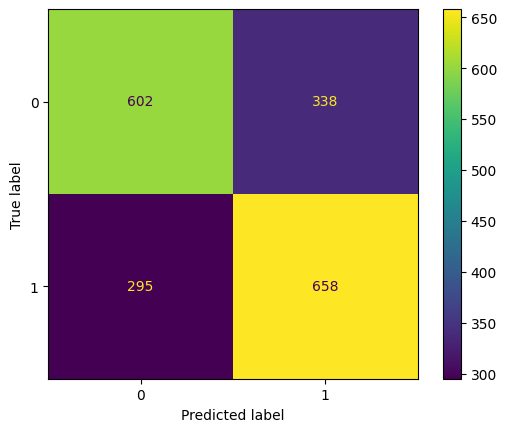

In [160]:
ConfusionMatrixDisplay.from_predictions(y_test_so, y_pred_so)

## Method 3: Oversampling using RandomOverSampler

In [187]:
from imblearn.over_sampling import RandomOverSampler

In [188]:
ros = RandomOverSampler(random_state=0)
X_o, y_o = ros.fit_resample(X, y)

In [189]:
X_o.shape, y_o.shape

((6354, 14), (6354,))

In [190]:
print('Original target variable count {}'.format(Counter(y)))
print('Oversampled target variable count {}'.format(Counter(y_o)))

Original target variable count Counter({0: 3177, 1: 572})
Oversampled target variable count Counter({0: 3177, 1: 3177})


In [191]:
X_traino, X_testo, y_traino, y_testo = train_test_split(X_o, y_o, test_size=0.3, random_state=0)

In [192]:
X_traino = scaler.fit_transform(X_traino)
X_testo = scaler.transform(X_testo)

In [193]:
lg.fit(X_traino, y_traino)

LogisticRegression()

In [194]:
y_predo = lg.predict(X_testo)

In [195]:
print('accuracy:', accuracy_score(y_testo, y_predo))
print('recall:', recall_score(y_testo, y_predo))
print('f1-score:', f1_score(y_testo, y_predo))
print('precision:', precision_score(y_testo, y_predo))

accuracy: 0.67488201363398
recall: 0.6992561105207227
f1-score: 0.6797520661157026
precision: 0.6613065326633166


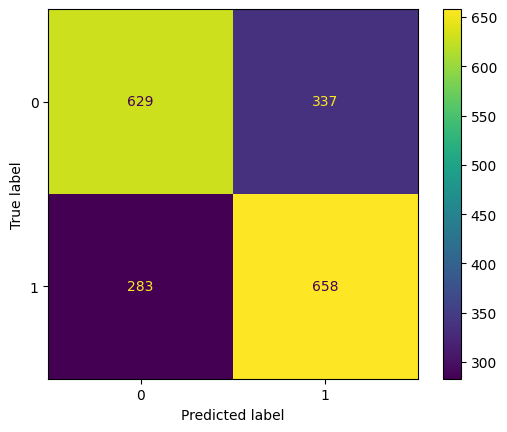

In [196]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predo)